# 05. 행렬

컴퓨터 그래픽스에서 ...

> numpy, sympy 필요

# 5.1 행렬이란

버스 정류장, 극장 등에서 줄을 길게 늘어선 것을 보고 *행렬을 이루고 있다*고 말한다. 수학에서 숫자가 늘어서 있는 것을 **행렬**, 영어로 **Matrix** 라고 한다.

### 5.1.1 행렬 표기

행렬은 가로 방향을 행, 세로 방향을 열이라한다. 행과 열을 사용해 $m행\times n열$ 행렬, $m\times n$ 행렬 이라고 말한다. 각 행렬을 구성하는 숫자를 요소, 성분이라고 한다.

행렬의 이름은 보통 대문자로 (), \[\] 괄호에 표기한다.

$$
A = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} \\
A = \begin{pmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix}
$$

#### 행.열 표시 예


행렬은 여러 차원을 가지는 데이터 레코드를 표현한다. 각 차원의 행, 열을 아래 첨자로 표기한다. 다음은 4차원 6개
의 4x6=24 데이터를 가진 행렬 $X$이다.


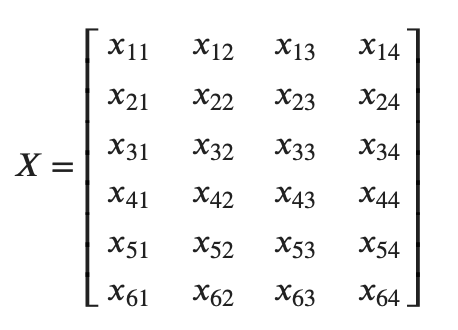


행렬의 크기는 "행 x 열" 형식으로 표시하므로 위 행렬은 다음 같이 나타낼 수 있다.

$ X \in R^{6x4} $

다음 같이 마크다운에서 라텍스 코딩을 해서 행렬을 표현해 보자.

```
$$
X = \begin{bmatrix} x_{11} & x_{12} & x_{13} & x_{14} \\ 
x_{21} & x_{22} & x_{23} & x_{24} \\
x_{31} & x_{32} & x_{33} & x_{34} \\
x_{41} & x_{42} & x_{43} & x_{44} \\
x_{51} & x_{52} & x_{53} & x_{54} \\
x_{61} & x_{62} & x_{63} & x_{64} \end{bmatrix} 
$$
```

NumPy에서 행렬은 `ndarray` 객체를 사용한다. 예를 들어 아래의 붗꽃 레코드를 `ndarray`로 구현하면

두 개 붗꽃 레코드를 행렬로 표기하면

$ X = \begin{bmatrix} 5.1, 3.5, 1.4, 0.2 \\
4.9, 3.0, 1.4, 0.2\end{bmatrix} $


In [1]:
# numpy 를 임포트하고 위 X행렬을 작성
import numpy as np
X = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2]
])
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [2]:
print(X.shape)
print(X.ndim)
print(X.size)

(2, 4)
2
8


#### 행렬의 행 표기법과 열 표기법

전치 연산과 행 벡터, 열 벡터를 이용하면 행렬을 복수의 열 벡터 $c_{j}$, 또는 복수의 행 벡터 $r_{j}^{T}$을 합친(concatenated) 형태로 표기할 수 있다.

$ X = \begin{bmatrix} \mid & \mid & & \mid \\
c_{1} & c_{2} & \cdots & c_{M} \\
\mid & \mid & & \mid \end{bmatrix} = \begin{bmatrix} - & r_{1}^{T} & - \\
 - & r_{2}^{T} & - \\ 
 & \vdots & \\
 - & r_{N}^{T} & - \\ \end{bmatrix}$
 
각 행렬의 크기는

행렬 : $ X \in R^{NxM} $

열 벡터: $ c_{j} \in R^{Nx1} (i = 1,\cdots,M)$

행 벡터: $ r_{j}^{T} \in R^{1xM} (j = 1,\cdots,N)$



### 5.1.2 행렬이 가지는 의미

이차원 평면을 3장에서 (x, y) 좌표 같이 표기했다. 4장에서 벡터로 (x성분, y성분) 처럼 표기할 수 있었다.

예를 들어 아래 같은 조사 데이터가 있다고 합시다.

표: 칼로리

상품 | 칼로리
------ | ----------
사과 | 145kcal/1개
우유 | 134kcal/1병
바나나| 72kcal/1개

표: 섭취량

이름 | 사과 | 우유 | 바나나
------ | ----- | ----- | -----
철수 | 1 | 2 | 3
영희 | 2 | 1 | 1

표: 가격

상품 | 편의점 | 슈퍼마켓 | 백화점
------ | ----- | ----- | -----
사과 | 1,500원 | 1,600원 | 2,500원
우유 | 2,400원 | 2,200원 | 6,800원
바나나 | 1,300원 | 1,100원 | 2,300원


이 조사 테이블을 수학적으로 표현하면 의미있는 숫자만으로 행렬로 표현할 수 있다.

$$
\begin{pmatrix} 145 \\ 134 \\ 72 
\end{pmatrix}
\\
\begin{pmatrix} 
1500 & 1600 & 2500 \\
2400 & 2200 & 6800 \\
1300 & 1100 & 2300 \end{pmatrix}
$$

---

# 5.2 행렬의 연산



### 덧셈과 뺄셈

같은 크기를 가진 두 개의 벡터/행렬은 덧셈과 뺄셈을 할 수 있다. 벡터와 행렬의 같은 위치의 성분 끼리 연산을 하고 이런 연산을 요소별(Element-wise) 연산이라 한다.

다음 x, y 벡터가 있다.

$$ x =  \begin{pmatrix} 
10 \\ 11 \\ 12 \end{pmatrix}, 
y =  \begin{pmatrix} 
0 \\ 1 \\ 2 \end{pmatrix}$$

두 베터의 *+*, *-* 연산은 다음 같다:

$$ x + y =  \begin{pmatrix} 
10 \\ 11 \\ 12 \end{pmatrix} + \begin{pmatrix} 
0 \\ 1 \\ 2 \end{pmatrix} = \begin{pmatrix} 
10 + 0 \\ 11+1 \\ 12+2 \end{pmatrix} 
= \begin{pmatrix} 
10 \\ 12 \\ 14 \end{pmatrix}
$$

$$ x - y =  \begin{pmatrix} 
10 \\ 11 \\ 12 \end{pmatrix} 
- \begin{pmatrix} 
0 \\ 1 \\ 2 \end{pmatrix} = \begin{pmatrix} 
10 - 0 \\ 11-1 \\ 12-2 \end{pmatrix} 
= \begin{pmatrix} 
10 \\ 10 \\ 10 \end{pmatrix}
$$


아래 표를 행렬의 덧셈

표: 아침 운동 횟수(회)

이름 | 스쿼트 | 팔굽혀펴기
------ | ----- | -----
철수 | 50 | 40
영희 | 10 | 10

표: 저녘 운동 횟수(회)

이름 | 스쿼트 | 팔굽혀펴기
------ | ----- | -----
철수 | 30 | 100
영희 | 20 | 15

이것을 행렬 없이 계산하려면 철수의 *스쿼트, 팔굽혀펴기* 합산, 영희의 *스쿼트, 팔굽혀펴기* 같이 4번의 계산을 거쳐야 한다. 행렬을 이용하면 데이터만 모아 빠르게 계산할 수 있다.

이것을 NumPy로 구현해 보자,

In [3]:
# 위 표의 철수,영희의 "스쿼트", "팔굽혀펴기" 합산
A = np.array([  # 아침
    [50, 40],
    [10, 10]
])
B = np.array([  # 저녁
    [30, 100],
    [20, 15]
])
print(A)
print(B)

[[50 40]
 [10 10]]
[[ 30 100]
 [ 20  15]]


In [4]:
A+B

array([[ 80, 140],
       [ 30,  25]])

In [5]:
B-A

array([[-20,  60],
       [ 10,   5]])

행렬의 덧셈/뻴셈에서는 다음 법칙이 성립한다.

1. 교환법칙: A + B = B + A
2. 결합법칙: (A + B) + C = A + (B + C)


### 5.2.2 행렬의 실수배


행렬 A에 실수 k배는 실수와 행렬의 곱으로 표현할 수 있다.

$$
A = \begin{pmatrix} a_{11} & a_{12} \\
a_{21} & a_{22} \end{pmatrix}\\ \\
kA = \begin{pmatrix} ka_{11} & ka_{12} \\
ka_{21} & ka_{22} \end{pmatrix}
\\
(k는 임의의 실수)
$$

행렬의 실수배에 다음 법칙이 성립:

1. 교환법칙: $kA = Ak$
2. 결합법칙: $(kl)A = k(lA)$
3. 분배법칙: $(k+l)A = kA + lA \\ k(A+B)=kA + kB$

In [6]:
# 행렬 (50,40)(10,10)
A = np.array([
    [50, 40],
    [10, 10]
])
0.8 * A

array([[40., 32.],
       [ 8.,  8.]])

In [7]:
A * 0.8

array([[40., 32.],
       [ 8.,  8.]])

### 5.2.3 곱셈

**두 행렬 A, B의 곱 AB는 A의 i행을 행벡터로, B의 j열을 열벡터로 생각했을 때, 행벡터와 열벡터의 내적을 i행 j열의 성분으로 하는 행렬** 이라고 정의한다.


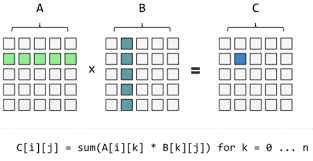

$$
A = \begin{pmatrix} a_{11} & a_{12} \\
a_{21} & a_{22} \end{pmatrix}, \quad B = \begin{pmatrix} b_{11} & b_{12}\\
b_{21} & b_{22} \end{pmatrix}\\
AB = \begin{pmatrix} a_{11}b_{11} + a_{12}b_{21} & a_{12} \\
a_{21} & a_{22} \end{pmatrix}
$$



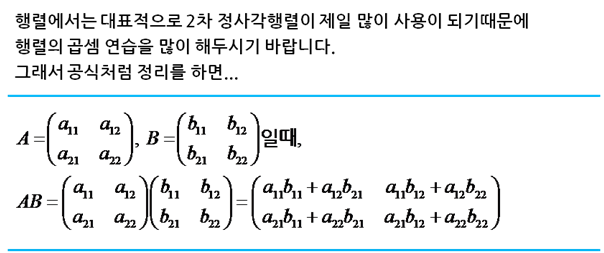


##### 행렬의 곱셈 참조
 - [행렬 곱셈의 원리](https://j1w2k3.tistory.com/575)
 - https://mathbang.net/562






다음 행렬의 곱은
$$
A =  \begin{bmatrix} 
2 & 7 \\
1 & 8 
\end{bmatrix}
,
B =  \begin{bmatrix} 
2 & 8 \\
1 & 3 
\end{bmatrix}
$$

다음 같이 계산할 수 있다.

$$
A\cdot B =  \begin{bmatrix} 
2 & 7 \\
1 & 8 
\end{bmatrix}
\cdot
 \begin{bmatrix} 
2 & 8 \\
1 & 3 
\end{bmatrix}
=  \begin{bmatrix} 
2\cdot 2 + 7\cdot 1 & 2\cdot 8 + 7\cdot 3\\
1\cdot 2 + 8\cdot1 & 1\cdot 8 + 8\cdot 3
\end{bmatrix}
$$


### NumPy로 행렬 곱셈연산

NumPy의 matrix() 함수를 사용해서 파이선 * 연산자로 곱셈을 할 수 있다.
 - https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html
 - 배열 객체, 데이터 문자열에서 행렬을 반환한다.

```python
class numpy.matrix(data, dtype=None, copy=True)
 - data: array, string
```


In [11]:
# 위 예의 행렬 A,B 의 곱
A = np.matrix([
    [2, 7],
    [1, 8]
])
B = np.matrix([
    [2, 8],
    [1, 3]
])
print(A)
print(B)
print(A * B)  # 주의! : ndarray와 다른 결과 나옴
# matrix의 곱은 행렬의 곱
# ndarray의 곱은 같은 위치의 원소끼리의 곱

[[2 7]
 [1 8]]
[[2 8]
 [1 3]]
[[11 37]
 [10 32]]


### 5.2.4 곱셈 규칙

1. 결합법칙: (AXB)XC = AX(BXC)
2. 분배법칙: AX(B+C) = (AXB)+(AXC)


행렬의 곱은 교환법칙이 성립하지 않는다. 예외를 제오하면 $AB \ne BA $라는 관계가 성립한다.
> 다만 단위행렬 E에서 임의행렬 A아 곱셈시 AE = EA = A라는 교환법칙이 성립한다.
> 단위행렬은 1과 같은 행렬이다.



곱셈을 위해서 왼쪽 곱해지는(피승수)의 열의 개수와 곱하는 쪽(승수)의 행의 개수가 같아야 한다.


In [14]:
# 2x2, 2x1 행렬의 연산은?
A = np.matrix([
    [1, 3],
    [2, 1]
]) # 2x2
B = np.matrix([
    [145],
    [100]
]) # 2x1
A * B

matrix([[445],
        [390]])

## 특수한 행렬

### 영 벡터

모든 원소가 0인 N차원 벡터는

$0_N = 0 = \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 0\end{bmatrix} $

문맥에서 벡터의 크기를 알 수 있을 때는 크기를 나타내는 아래첨자를 생략할 수 있다.

In [17]:
# 영벡터
print(np.zeros((1, 4)))
print(np.zeros((3, 4)))

[[0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 일 행렬

모든 원소가 1인 N차원 행렬,

$1_N = 1 = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1\end{bmatrix} $



In [18]:
# 일벡터
np.ones((3, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])


##### `ones_like()`, `zeros_like()`

주어진 배열 혹은 리스트와 같은 크기의 일행렬, 영행렬 배열을 생성해 준다. 예를 들어 다음 같은 배열이 있으면

```
a = [[1,2,3],
       [4,5,6]]
```


In [21]:
a = np.array([[1,2,3],[4,5,6]])
# 벡터에서 일벡터, 영벡터
print(np.ones_like(a))
print(np.zeros_like(a))

[[1 1 1]
 [1 1 1]]
[[0 0 0]
 [0 0 0]]


### 정방행렬 Square matrix

행의 크기와 열의 크기가 같은 행렬,

$ X = \begin{pmatrix} 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1\end{pmatrix} $



In [22]:
# 정방행렬: 3x3
np.array([[1,2,3],[4,5,6],[7,8,9]])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [23]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 대각행렬 Diagonal matrix

행의 숫자와 열의 숫자가 같은 위치를 **대각(Diagonal)** 이라고 하고, 대각이 아닌 위치의 요소는 *비대각(off diagonal)*이라고 한다. 그리고 모든 비대각 요소가 0인 정방행렬을 대각행렬(digonal matrix)라고 한다.

$ D = \begin{pmatrix} D_{1} & 0 & \cdots & 0 \\ 
0 & D_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & D_{N} \end{pmatrix} \quad D \in R^{NxN}$

아래는 2이 대각인 대각행렬이다.

$D = \begin{pmatrix} 2 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 2 \end{pmatrix}$


NumPy에서 ndarray 객체에서 `diag()` 메서드를 사용한다. diag() 함수로 생성시 대각성분만 제공한다.

```
np.diag((a,b,c,d))
```

In [28]:
# 대각행렬 생성
np.diag((1, 2, 3, 4)) # 대각요소만 주면 됨

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

### 대칭행렬 Symmetric matrix

전치 연산을 통해서 얻어진 전치 행렬과 원래의 행렬이 같으면 **대칭행렬**이라고 한다. 또한 정방행렬만 대칭행렬이 될 수 있다.

$S^{T}\quad =\quad S$

$S\quad =\quad { S }^{ NxM }$




## 5.2.5 단위행렬 Identity matrix

*대각행렬* 중에서 **모든 대각 성분이 1이고 나머지는 0인 대각행렬**을 **단위행렬**이라고 한다. 단위행렬은 보통 E 또는 I로 표기한다.

$I = \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{pmatrix}$

단위행렬은 항등행렬이라고 한다. 그러므로 단위행렬은 대각행렬 Diagonal 이기도 하다.

##### NumPy 단위행렬

NumPy에서 단위행렬은 `identity()`, `eye()` 메서드로 생성할 수 있다.


In [29]:
# 3x3 단위 행렬 생성 : identity
np.identity(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [30]:
# 3x3 단위 행렬 생성 : eye
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

##### 단위 행렬의 곱

단위행렬은 숫자값 데이터에서 1 같은 역할을 한다. 5x1=5, 10x1=10 이듯, 이 단위행렬에 어떤 행렬을 곱하더라도 답은 다른쪽 행렬과 동일한 행렬이 된다.

$$
AE = EA = A
$$

NumPy에서 행렬의 곱은 matrix 를 이용하므로 단위 행렬을 이용한 곱을 아래 같이 해 볼 수 있다.

In [33]:
# 3x3 단위행렬의 곱
I = np.matrix(np.eye(3)) # eye 로 3x3 행렬
B = np.matrix([
    [1, 3, 5],
    [4, 8, 1],
    [3, 7, 5]
]) # 임의의 3x3 행렬
print(I * B)
print(B * I)

[[1. 3. 5.]
 [4. 8. 1.]
 [3. 7. 5.]]
[[1. 3. 5.]
 [4. 8. 1.]
 [3. 7. 5.]]


단위행렬일 때 곱셈의 교환법칙이 섭립한다

In [36]:
# 위 두 행렬의 곱셈 교환법칙
print(I*B)
print(B*I)

[[1. 3. 5.]
 [4. 8. 1.]
 [3. 7. 5.]]
[[1. 3. 5.]
 [4. 8. 1.]
 [3. 7. 5.]]


## 5.2.6 역행렬

행렬 A, B가 있을 때 아래가 성립하면 행렬B는 행렬A의 역행렬이 된다.
역행렬은 $A^{-1}$ 로 표기한다.

$$
AB = BA = A^{-1}
$$

즉,

$$
A = \begin{pmatrix} a_{11} & a_{12} \\
a_{21} & a_{22} \end{pmatrix} 일 때\\
\\
A^{-1} = \frac{1}{a_{11}a_{22}-a_{12}a_{21}}
\begin{pmatrix} a_{22} & -a_{12} \\
-a_{21} & a_{11} \end{pmatrix}
$$

역행렬 구할 때는 $a_{11}a_{22}-a_{12}a_{21}\ne0$ 인지 여부를 확인해야 한다.

$A = \begin{pmatrix} 5 & 3 \\ 2 & 1 \end{pmatrix}$ 는 $5-6\ne 0$ 이므로 역행렬이 존재한다.

NumPy의 linalg.inv() 함수로 역행렬을 구할 수 있다. np.linalg.inv()는 결과로 부동소수를 반환한다.

In [38]:
# 2x2 행렬의 역행렬을 구하자.

A = np.matrix([
    [5, 3],
    [2, 1]
])# 2x2 행렬
B = np.linalg.inv(A)# 역행렬
B

matrix([[-1.,  3.],
        [ 2., -5.]])

**역행렬을 원래행렬과 곱하면 단위행렬이 된다.**

In [40]:
(B * A).astype(np.int64)

matrix([[1, 0],
        [0, 1]], dtype=int64)

## 5.2.7 역행렬과 연립방정식

역행렬을 사용하면 **연립방정식**을 풀수 있다. 이 책에서는 SymPy 패키지를 사용해서 연립방정식을 풀어 보았다.
 - [3.2 SymPy이용](03_방정식_도형.ipynb#SymPy-이용-풀기)
 - [3.3.3 두 직선의 교점](03_방정식_도형.ipynb#3.3.3-두-직선의-교점)
 
symPy 같은 라이브러리가 없으면 프로그래밍 언어에서 연립방정식을 직접 풀어야 하는데 이때 **역행렬**이 큰 역할을 한다.

아래 같은 연립방정식이 있다.

$$
5x + 3y = 9\\
2x + y = 4
$$

방정식을 행렬로 표현하면 

$$
\begin{pmatrix}5 & 3 \\ 2 & 1 \end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}9 \\4 \end{pmatrix}
$$

연립방정식을 행렬을 이용해 풀기위해서 행렬의 다음 두 특성이 중요하다.

 - 행렬과 역행렬을 곱하면 단위행렬이 된다.
 - 어떤 행렬을 단위행렬에 곱한 결과는 원래 행렬이다.


행렬 $\begin{pmatrix}5 & 3 \\ 2 & 1 \end{pmatrix}$ 의 역행렬을 양변에 곱하면

$$
\begin{pmatrix}-1 & 3 \\ 2 & -5 \end{pmatrix}
\begin{pmatrix}5 & 3 \\ 2 & 1 \end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}-1 & 3 \\ 2 & -5 \end{pmatrix}
\begin{pmatrix}9 \\4 \end{pmatrix}
$$

이 식을 정리하면

$$
\begin{pmatrix}1 & 0 \\ 0 & 1 \end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}-1 & 3 \\ 2 & -5 \end{pmatrix}
\begin{pmatrix}9 \\4 \end{pmatrix}
$$

단위행렬은 어떤 행렬을 곱해도 원래 행렬과 같으므로 좌변을 다음 같이 쓸 수 있다.

$$
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}-1 & 3 \\ 2 & -5 \end{pmatrix}
\begin{pmatrix}9 \\4 \end{pmatrix}
$$

이것을 풀면

$$
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}-1\times 9 + 3\times4 \\ 2\times 9 + -5\times4 \end{pmatrix} =
\begin{pmatrix}3 \\-2 \end{pmatrix}
$$



#### 행렬의 장점

수학에서는 대입법, 가감법으로 연립방정식을 풀 수 있다. 그런데 컴퓨터 프로그래밍으로 이것을 적용하면 **식**에 따라서 계산하는 방법이 달라지므로 프로그래밍으로 구현하기 어렵다. 그러나 행렬을 사용하면 다음 순서로 계산할 수 있다.

1. 연립방정식을 행렬로 나타낸다
2. 미지의 계수로 만든 행렬의 역행렬을 구한다.
3. 구한 역행렬을 1의 식 양변에 곱한다.

역행렬을 이용하면 역행렬 구하는 방법, 행렬끼리 곱셈도 정해져 있어서 행렬을 사용하면 연립방정식의 해를 기계적으로 구할 수 있다. 프로그래밍에 적합한 것이다.

numpy 를 이용해 위 연립방정식의 해를 구해 보자,

In [52]:
# 위 방정식 예를 행렬로 구성
A = np.matrix([
    [5, 3],
    [2, 1]
])
B = np.matrix([
    [9],
    [4]
])

# 역행렬을 구한다
inv_A = np.linalg.inv(A) # A의 역행렬

inv_A * B

matrix([[ 3.],
        [-2.]])

Symbol 을 이용해 연립방정식의 해를 구해보자,

In [56]:
# sympy 를 이용해서 연립방정식을 구성해 푼다.
from sympy import Symbol, solve

x, y = Symbol('x'), Symbol('y')# 심볼 정의 
ex1 = 5*x + 3*y -9 # 방정식 선언
ex2 = 2*x + y - 4 # 방정식 선언

solve((ex1,ex2))

{x: 3, y: -2}

#### 연립방정식을 역행렬로 프로그래밍 하기

프로그래밍 언어로 직접 연립방정식의 해를 역행렬로 구하는 과정을 프로그래밍으로 구현해 보자. 아래 같은 방정식이 있다고 가정하자,

$$
ax + by = s\\
cx + dy = t
$$

##### 1. 연립방정식을 행렬로 나타낸다

방정식을 행렬로 표현하면 

$$
\begin{pmatrix}a & b \\ c & d \end{pmatrix}
\begin{pmatrix}x \\y \end{pmatrix} = 
\begin{pmatrix}s \\t \end{pmatrix}
$$

행렬 $\begin{pmatrix}a & b \\ c & d \end{pmatrix}$의 역행렬을 곱해 x, y 식으로 정리하면,

##### 2. 미지의 계수로 만든 행렬의 역행렬을 구한다.

$$
A = \begin{pmatrix}a & b \\ c & d \end{pmatrix} 일 때\\
A의 행렬은 \\
A^{-1}= \frac{1}{ad-bc}
\begin{pmatrix} d & -b \\
-c & a \end{pmatrix}\\
$$


##### 3. 구한 역행렬을 1의 식 양변에 곱한다.


결국 행렬로 풀면

$$
A^{-1}\begin{pmatrix}a & b \\ c & d \end{pmatrix} \begin{pmatrix}x \\ y \end{pmatrix} =
A^{-1}\begin{pmatrix}s \\ t \end{pmatrix}\\
\\
결국\\
\therefore \begin{pmatrix}x \\ y \end{pmatrix} = 
A^{-1}\begin{pmatrix}s \\ t \end{pmatrix}
$$

x, y로 풀어보면,

$$
A^{-1}= \frac{1}{ad-bc}
\begin{pmatrix} d & -b \\
-c & a \end{pmatrix} 이므로 \\
\\
x = \frac{d}{ad-bc} + \frac{-b}{ad-bc} \\
y = \frac{-c}{ad-bc} + \frac{a}{ad-bc}
$$


위 역행렬을 이용핸 연립방정식을 파이썬으로 풀어보면,

$$
5x + 3y = 9\\
2x + y = 4
$$


In [57]:
# 위 방정식의 행렬
a, b, c, d = 5, 3, 2, 1
s, t = 9, 4
k = a*d - b*c
x = ((d/k)*s) + ((-b/k)*t)
y = ((-c/k)*s) + ((a/k)*t)
x,y

(3.0, -2.0)

---


# 참고

1. 파이썬으로 배우는 핵심 고등수학
1. [벡터와 행렬의 연산](https://datascienceschool.net/view-notebook/3f44cfdda2874080a9aa6b034c71d5ec/)
2. [벡터 연산 - 분해,내적,외적](http://mrw0119.tistory.com/12)
3. 선형대수 http://pinkwink.kr/720
1. [NumPy를 활용한 선형대수 입문](https://datascienceschool.net/view-notebook/cd600e9627cd4f16bc4f6078231ab28c/)

2. [\[공업수학\]벡터의 기초](http://pinkwink.kr/157)